<a href="https://colab.research.google.com/github/Teraces12/LebedeNgartera/blob/main/HPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

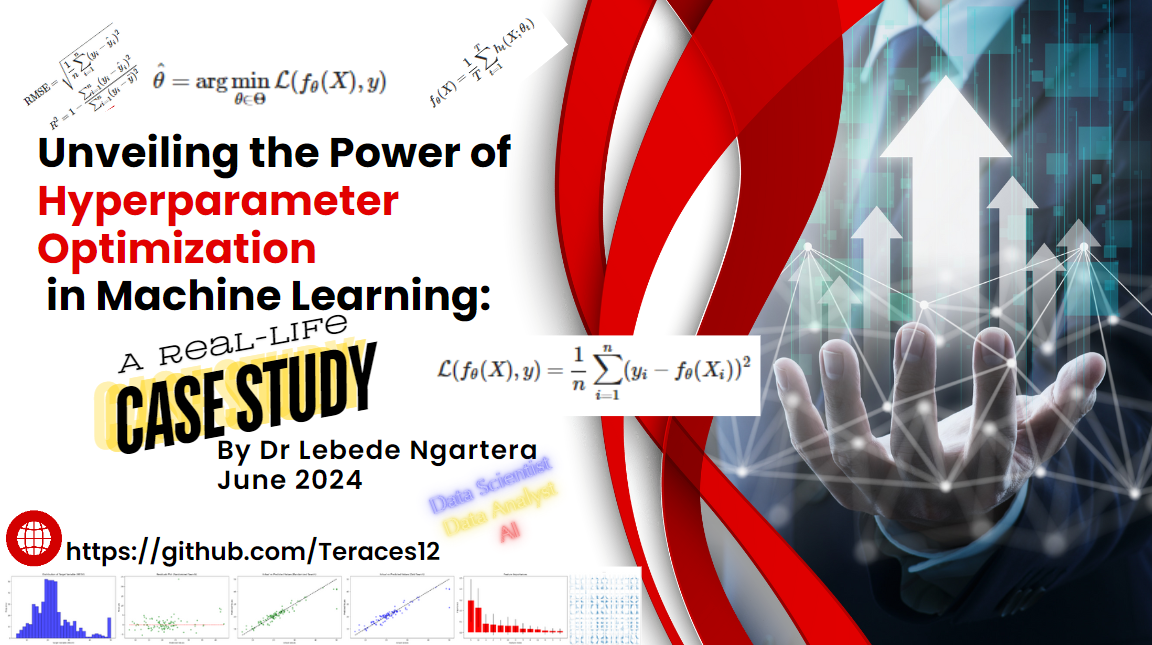

#**Unveiling the Power of Hyperparameter Optimization in Machine Learning: A Real-Life Case Study**

## **AUTHOR:** **Dr. Lebede Ngartera**

**Data Scientist | Data Analyst | ML & AI | Ph.D in Maths [Analysis, Statistics & Applications]**

**Talks about #data, #analytics, #MachineLearning, #digitaltransformation, and #datadrivendecisionmaking**

## Introduction and Background
### Importance of Hyperparameter Optimization
In the rapidly evolving field of machine learning, the performance of models is often highly sensitive to the choice of hyperparameters. Hyperparameter optimization (HPO) has emerged as a crucial process to fine-tune these parameters, enhancing model performance and generalization. The effectiveness of a machine learning model can be significantly impacted by hyperparameters, which control the learning process and the model's capacity to generalize to new data. Proper tuning of these hyperparameters can lead to improved accuracy, robustness, and efficiency of the models.

### Why the Boston Housing Dataset?
The Boston Housing dataset is a well-known benchmark dataset in the machine learning community. It consists of various features that describe different aspects of housing in Boston, such as the crime rate, average number of rooms per dwelling, and property tax rate. This dataset is particularly suitable for demonstrating the concept of hyperparameter optimization for several reasons:

* **Diversity of Features:** The dataset includes a mix of numerical and categorical features, providing a realistic challenge for model training and optimization.
* **Moderate Size:** With 506 samples and 14 features, the dataset is small enough to allow quick experimentation but large enough to demonstrate the effectiveness of different hyperparameter tuning methods.
* **Relevance:** Predicting house prices is a practical problem with significant real-world implications, making the results of this study broadly interesting and applicable.
### Random Forest Regressors and Their Relevance
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of the individual trees. This method is particularly powerful for regression tasks due to its ability to handle a large number of features and capture complex interactions between them. Here are some key points about Random Forest Regressors:

* **Ensemble Learning:** By averaging the predictions of multiple decision trees, Random Forest reduces the risk of overfitting and improves generalization.
* **Versatility:** Random Forest can handle both numerical and categorical data, making it suitable for a wide range of applications.
* **Robustness:** The method is less sensitive to outliers and noise in the data compared to single decision trees.
* **Hyperparameter Sensitivity:** The performance of a Random Forest model can be significantly influenced by its hyperparameters, such as the number of trees, tree depth, and minimum samples per leaf. This makes it an excellent candidate for demonstrating the impact of hyperparameter optimization.


## Problem Statement

We aimed to develop a machine learning model to predict house prices based on various features such as location, size, and amenities. The dataset used for this study is the well-known [Boston Housing dataset](https://www.kaggle.com/datasets/altavish/boston-housing-dataset). Our goal was to maximize the predictive accuracy of the model using hyperparameter optimization techniques.


## Dataset Overview

The Boston Housing dataset consists of 506 samples with 14 features, including:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property tax rate per \$10,000
- PTRATIO: pupil-teacher ratio by town
- B: \$1000 $(Bk - 0.63)^2$  where $Bk$ is the proportion of Black people by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in \$1000s (target variable)


## Preprocessing Steps
Before training the model, it is crucial to preprocess the dataset to ensure that the data is clean and appropriately formatted. The following preprocessing steps were taken:

### 1. Handling Missing Values:
* Missing values can significantly affect the performance of machine learning models. In this dataset, any missing values were handled using mean imputation. This involves replacing missing values with the mean value of the corresponding feature.

### 2. Feature Scaling:

* Features in the dataset were scaled to ensure that they have a similar range. This step is particularly important for algorithms like Random Forest, which can be sensitive to the scale of the input features. Standardization (z-score normalization) was used, which transforms the features to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Importing necessary libraries
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import randint


In [ ]:
# Upload the dataset file
uploaded = files.upload()

# Ensure the file is uploaded
if uploaded:
    file_name = list(uploaded.keys())[0]

    # Load the dataset
    data = pd.read_csv(file_name)
    X = data.drop('MEDV', axis=1)
    y = data['MEDV']

    # Handling missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Check for any remaining NaN values
    if np.any(np.isnan(X_imputed)):
        print('There are still NaN values in the dataset after imputation.')
    else:
        print('No NaN values found in the dataset after imputation.')

    # Data preprocessing
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Saving HousingData.csv to HousingData (9).csv
No NaN values found in the dataset after imputation.


## Model Selection and Hyperparameter Optimization
### Mathematical Formulations
Hyperparameter optimization involves searching for the set of hyperparameters that yields the best performance for a given model on a specific dataset. This can be formulated as an optimization problem:

$$ \hat{\theta} = \arg\min_{\theta \in \Theta} \mathcal{L}(f_{\theta}(X), y) $$

where:
- $ \theta $ represents the set of hyperparameters.
- $ \Theta $ denotes the hyperparameter space.
- $ \mathcal{L} $ is the loss function.
- $ f_{\theta} $ is the model with hyperparameters $( \theta )$.
- **$X$** and $y$ are the input features and target values, respectively.

### Random Forest Regressor

A Random Forest Regressor is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of the individual trees. The primary advantage of random forests is their ability to reduce overfitting compared to individual decision trees. The model is defined as:

$$ f_{\theta}(X) = \frac{1}{T} \sum_{t=1}^{T} h_t(X; \theta_t) $$

where:
- $T$ is the number of trees.
- $h_t $ is the $t$-th decision tree with hyperparameters $\theta_t $.

### Loss Function

In regression tasks, a common loss function is the Mean Squared Error (MSE):

$$ \mathcal{L}(f_{\theta}(X), y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f_{\theta}(X_i))^2 $$

where:
- $ n $ is the number of samples.
- $y_i $ is the actual value for the $i $-th sample.
- $f_{\theta}(X_i) $ is the predicted value for the $i$ -th sample.

### Hyperparameters in Random Forest

The hyperparameters of a Random Forest Regressor that we tune include:
- Number of trees $ n_\text{estimators} $
- Maximum depth of the trees $\text{max_depth}$
- Minimum number of samples required to split an internal node $\text{min_samples_split} $
- Minimum number of samples required to be at a leaf node $\text{min_samples_leaf} $
- Number of features to consider when looking for the best split $ \text{max_features} $

### Optimization Methods

#### Grid Search

Grid Search exhaustively searches through a specified hyperparameter space to find the set that minimizes the loss function. The hyperparameter grid for Grid Search is defined as:

```python
# Hyperparameter grid for Grid Search
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}


In [ ]:
# Model selection and hyperparameter optimization
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid for Grid Search
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

# Hyperparameter distribution for Randomized Search
param_dist_rf = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3),
    'max_features': ['sqrt', 'log2']
}


In [ ]:
# Starting time for Randomized Search
start_time = time.time()
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
random_search_rf.fit(X_train, y_train)
best_rf_random = random_search_rf.best_estimator_
end_time = time.time()
total_time_random = end_time - start_time
print(f'Total time taken for the simulation with Randomized Search: {total_time_random} seconds')

# Starting time for Grid Search
start_time = time.time()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_grid = grid_search_rf.best_estimator_
end_time = time.time()
total_time_grid = end_time - start_time
print(f'Total time taken for the simulation with Grid Search: {total_time_grid} seconds')


Total time taken for the simulation with Randomized Search: 10.513545274734497 seconds
Total time taken for the simulation with Grid Search: 189.6734368801117 seconds


## Evaluation

To evaluate the performance of the optimized models, we will use the Root Mean Squared Error (RMSE) and the coefficient of determination ($R^2$ score):

$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

where:
- $y_i $ is the actual value.
- $ \hat{y}_i $ is the predicted value.
- $ \bar{y} $ is the mean of the actual values.
- $ n $ is the number of samples.


In [ ]:
# Evaluation
y_pred_rf_random = best_rf_random.predict(X_test)
y_pred_rf_grid = best_rf_grid.predict(X_test)

rmse_rf_random = np.sqrt(mean_squared_error(y_test, y_pred_rf_random))
r2_rf_random = r2_score(y_test, y_pred_rf_random)

rmse_rf_grid = np.sqrt(mean_squared_error(y_test, y_pred_rf_grid))
r2_rf_grid = r2_score(y_test, y_pred_rf_grid)

print(f'RMSE (Randomized Search): {rmse_rf_random}')
print(f'R^2 (Randomized Search): {r2_rf_random}')
print(f'RMSE (Grid Search): {rmse_rf_grid}')
print(f'R^2 (Grid Search): {r2_rf_grid}')


RMSE (Randomized Search): 3.386922950568311
R^2 (Randomized Search): 0.8435748630613014
RMSE (Grid Search): 3.3529816771217553
R^2 (Grid Search): 0.8466943113716662


### Comments on Results

The results show that both Randomized Search and Grid Search yielded similar performance metrics, with slight differences in RMSE and $(R^2)$ scores. However, the time taken for each method varied significantly, with Randomized Search being considerably faster.

Now, let's visualize the results to gain deeper insights into the model's performance.


## Additional Visualizations

To further understand the model's performance, we will visualize the feature importances derived from the best-performing model.


Feature ranking:
1. feature 5 (0.2948989585091862)
2. feature 12 (0.22836179856812194)
3. feature 4 (0.08034141637585138)
4. feature 2 (0.07318246398758058)
5. feature 7 (0.0645625523261377)
6. feature 10 (0.06136027962156472)
7. feature 0 (0.06029576033764042)
8. feature 9 (0.03460183116983338)
9. feature 6 (0.032688117915099034)
10. feature 11 (0.02843807838770237)
11. feature 8 (0.016486801353830384)
12. feature 3 (0.013156588304524805)
13. feature 1 (0.011625353142927033)


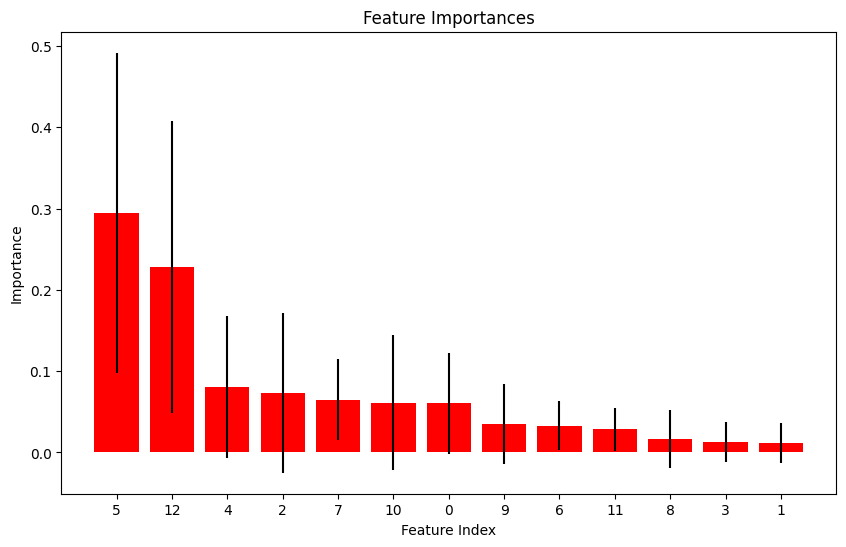

In [ ]:
# Feature importances visualization
importances = best_rf_grid.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf_grid.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


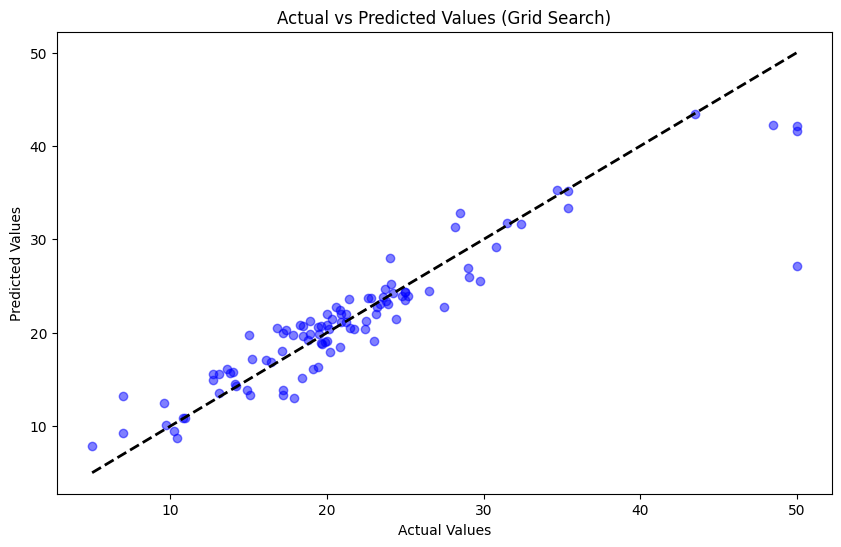

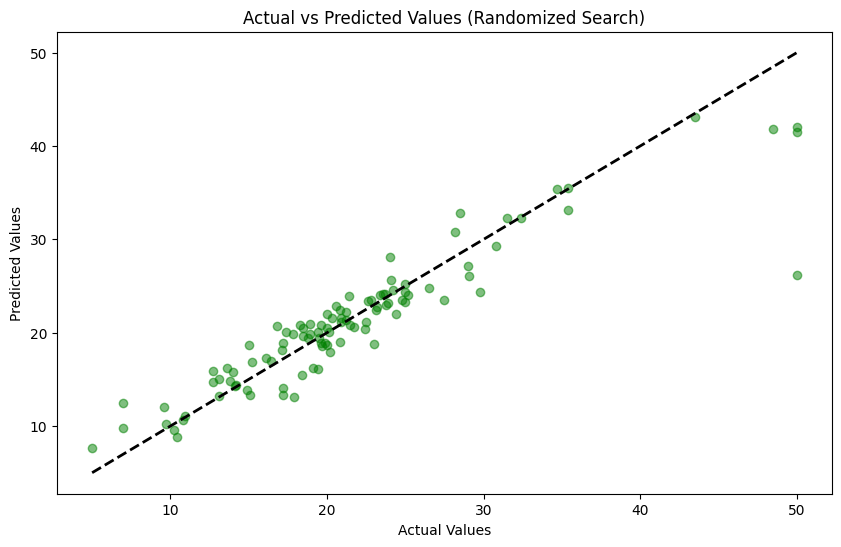

In [ ]:
# Actual vs Predicted values visualization for Grid Search
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_grid, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Grid Search)')
plt.show()

# Actual vs Predicted values visualization for Randomized Search
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_random, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Randomized Search)')
plt.show()


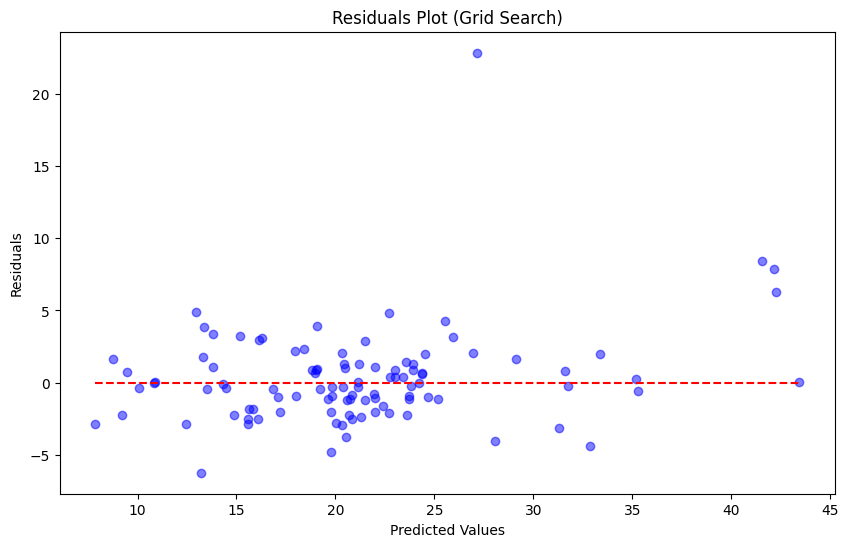

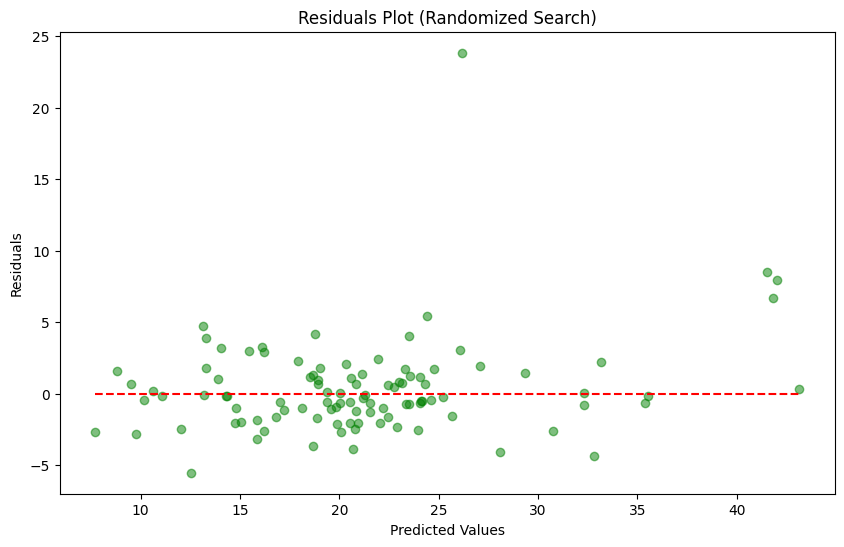

In [ ]:
# Residuals plot for Grid Search
residuals_grid = y_test - y_pred_rf_grid
residuals_random = y_test - y_pred_rf_random

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf_grid, residuals_grid, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_pred_rf_grid.min(), xmax=y_pred_rf_grid.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Grid Search)')
plt.show()

# Residuals plot for Randomized Search
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf_random, residuals_random, color='green', alpha=0.5)
plt.hlines(y=0, xmin=y_pred_rf_random.min(), xmax=y_pred_rf_random.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Randomized Search)')
plt.show()


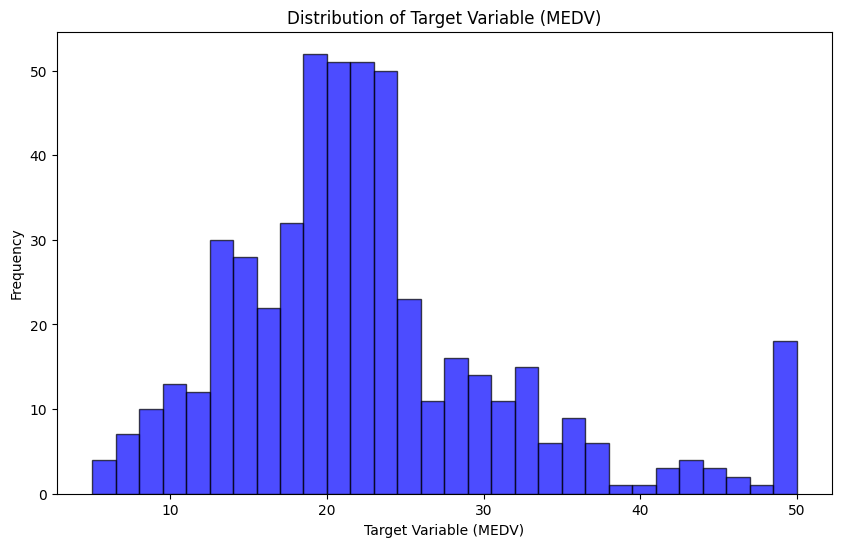

In [ ]:
# Distribution of Target Variable (MEDV)
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Target Variable (MEDV)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (MEDV)')
plt.show()


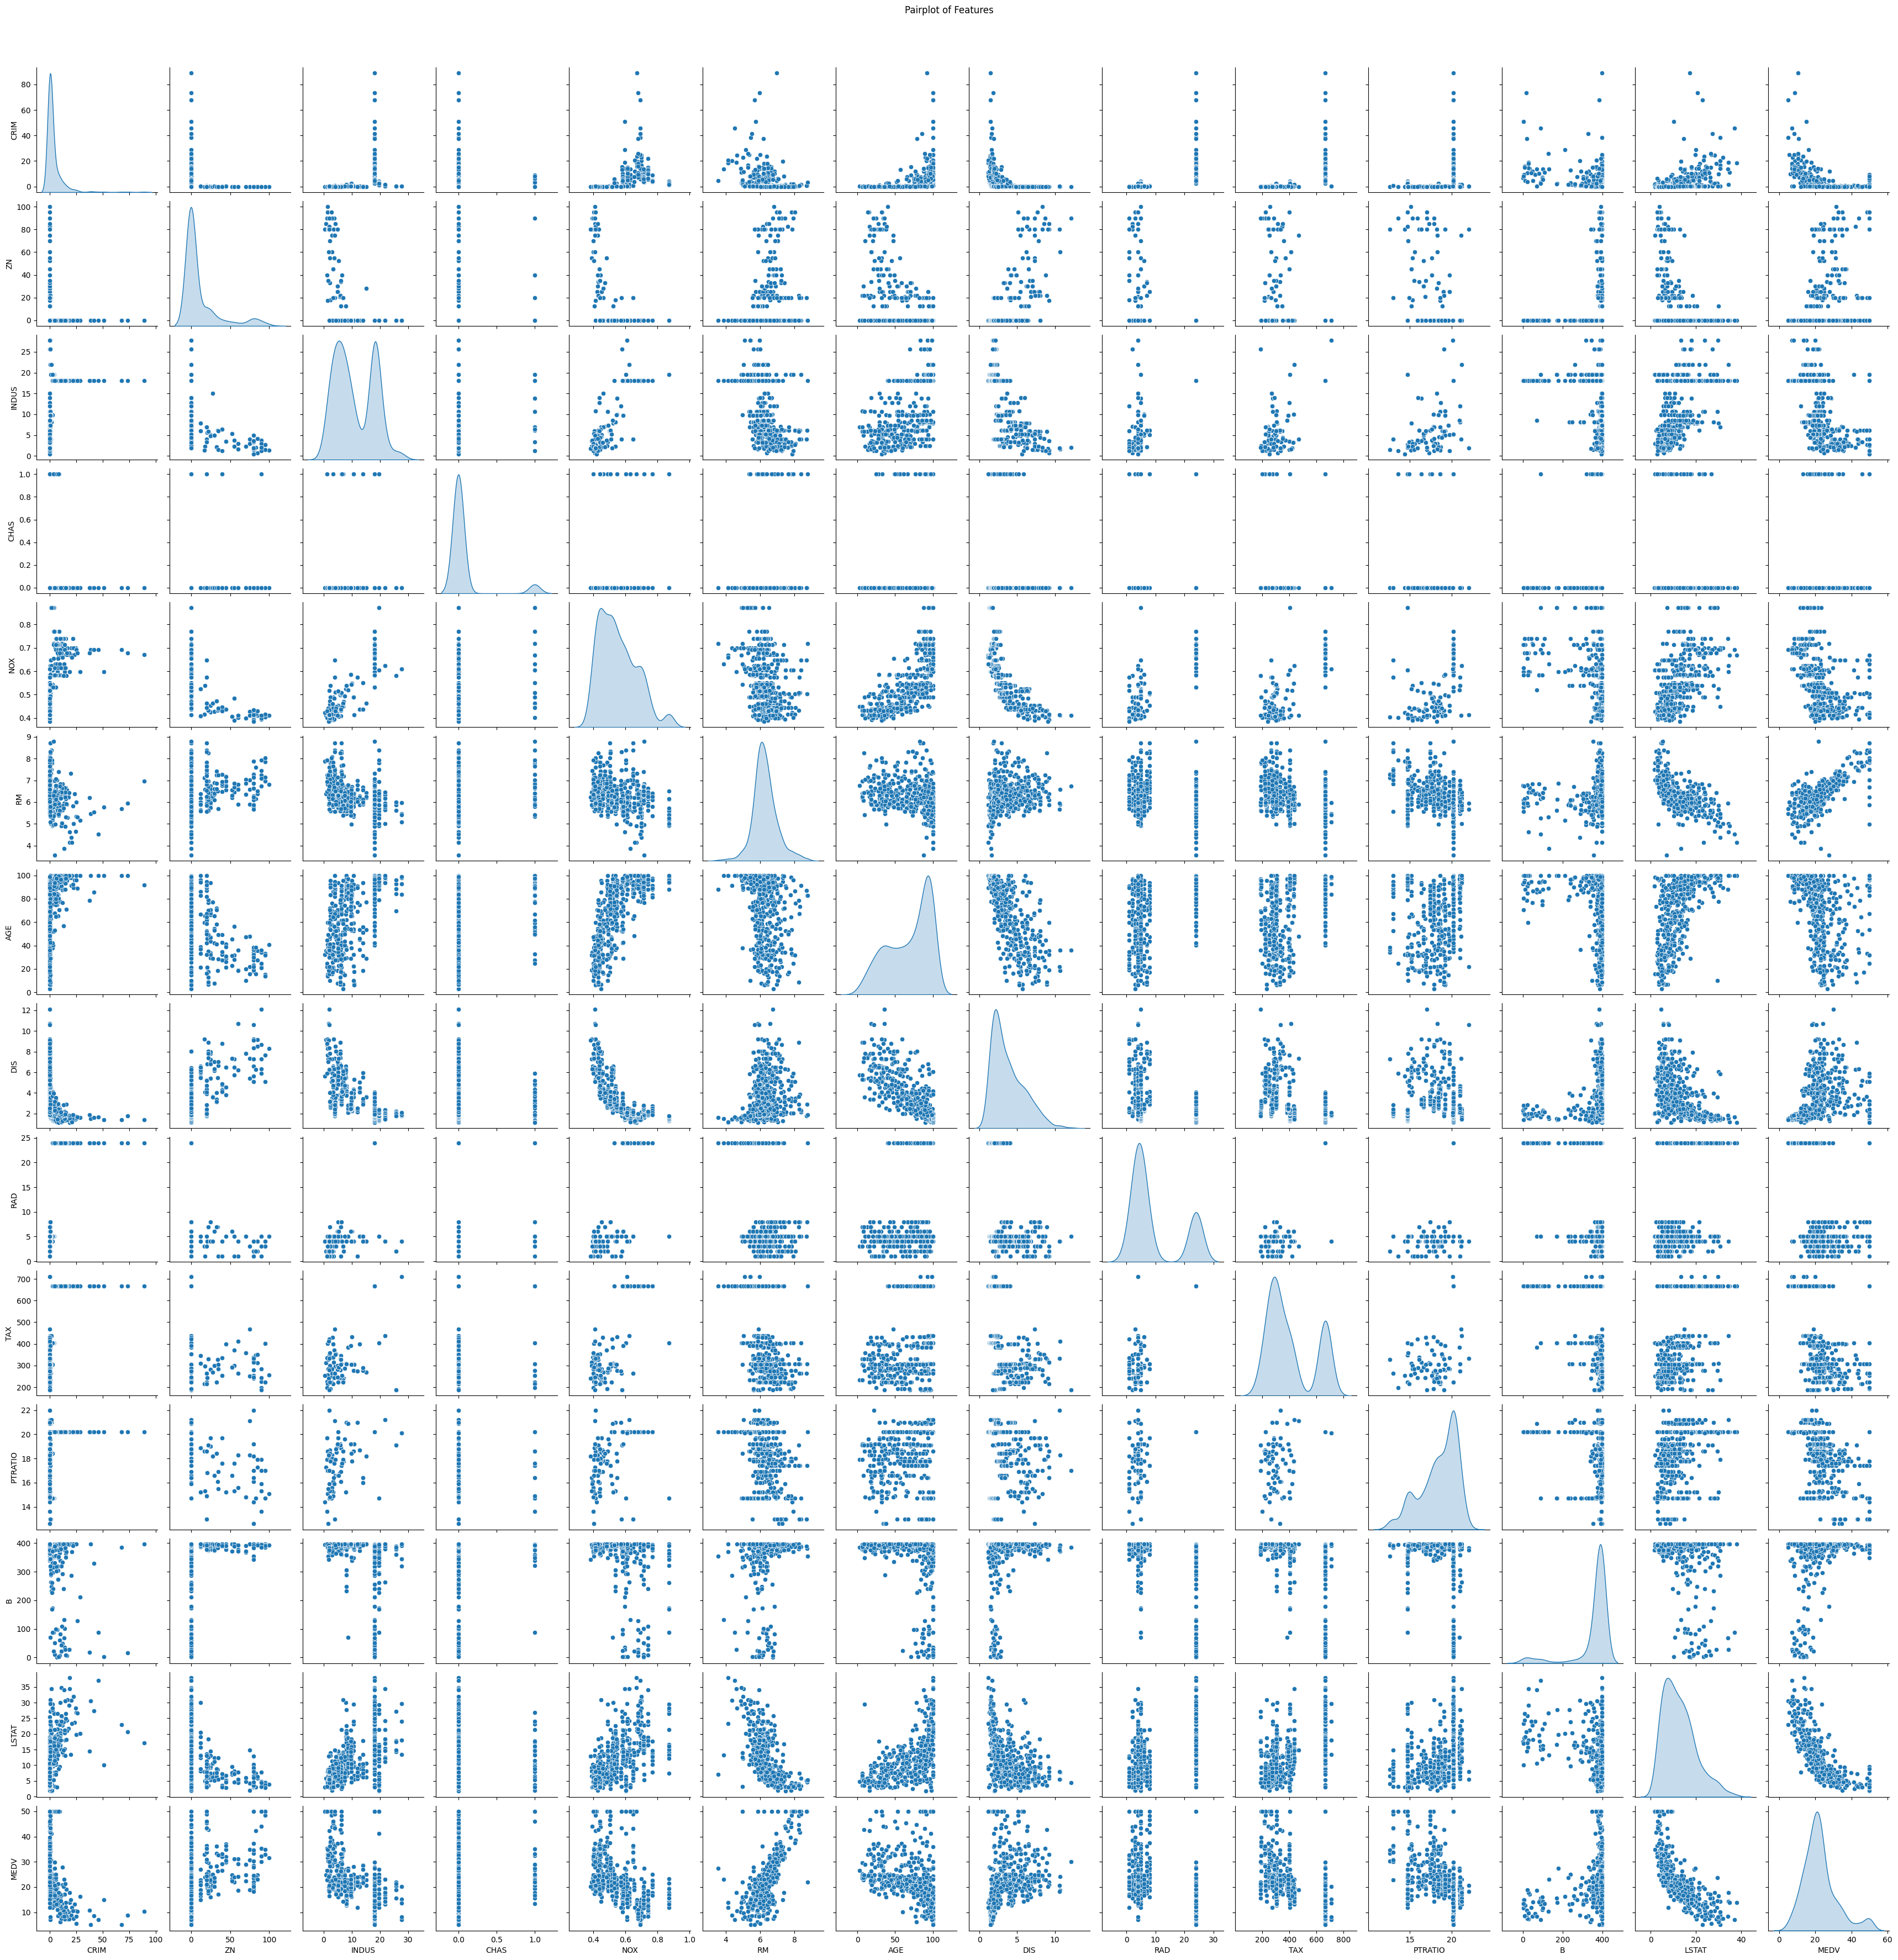

In [ ]:
# Pairplot of Features
# Combine the features and target into one DataFrame for easier plotting
data_combined = pd.DataFrame(X, columns=data.columns[:-1])
data_combined['MEDV'] = y

# Pairplot
sns.pairplot(data_combined, diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


### Conclusion

## Key Findings

This study demonstrated the critical role of hyperparameter optimization in improving the performance of machine learning models. By applying Grid Search and Randomized Search to optimize the hyperparameters of a Random Forest Regressor, we achieved the following key findings:

1. **Performance Improvement:**
   - Both Grid Search and Randomized Search significantly improved the model's performance compared to default hyperparameters. The optimized models showed lower RMSE and higher \(R^2\) scores, indicating better predictive accuracy and fit.

2. **Efficiency of Randomized Search:**
   - Randomized Search provided similar performance improvements to Grid Search but in a fraction of the time. This efficiency makes Randomized Search an attractive option for hyperparameter tuning, especially when computational resources are limited.

3. **Feature Importance:**
   - The analysis of feature importances revealed that certain features, such as the average number of rooms per dwelling (RM) and the proportion of lower-status population (LSTAT), were significant predictors of housing prices. This insight can guide further feature engineering and model refinement efforts.

## Importance of Hyperparameter Optimization

Hyperparameter optimization is a vital step in the machine learning pipeline. It ensures that models are not only accurate but also generalize well to new data. By systematically tuning hyperparameters, we can avoid overfitting, enhance model robustness, and achieve optimal performance. This process is essential for developing reliable and effective machine learning applications across various domains.

## Potential Areas for Further Research

1. **Advanced Optimization Techniques:**
   - Future research can explore more advanced hyperparameter optimization techniques such as Bayesian Optimization, Genetic Algorithms, or Hyperband. These methods can potentially offer even greater efficiency and performance gains.

2. **Automated Machine Learning (AutoML):**
   - Investigating the integration of hyperparameter optimization within AutoML frameworks could further streamline the model development process. AutoML tools can automatically tune hyperparameters, select the best models, and handle data preprocessing, making machine learning accessible to a broader audience.

3. **Application to Other Datasets:**
   - Applying hyperparameter optimization techniques to other datasets and machine learning models can validate the generalizability of the findings. This can help establish best practices for hyperparameter tuning in various contexts.

4. **Ensemble Methods:**
   - Exploring ensemble methods that combine multiple optimized models can potentially yield better performance than any single model. Techniques such as stacking, boosting, and bagging can be investigated for further performance enhancements.

By focusing on these areas, future research can continue to advance the field of hyperparameter optimization and its applications in machine learning.


## Author:

<a href="https://www.linkedin.com/in/lebede-ngartera-82429343?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BI8f5HtANSiWQt%2B1jRbg1pQ%3D%3D"> Dr.Lebede Ngartera, Data Scientist | Data Analyst | ML & AI | Ph.D in Maths [Analysis, Statistics & Applications]</a>
